In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble
import sklearn.gaussian_process
import sklearn.neural_network

import warnings
warnings.filterwarnings("ignore")

In [23]:
data = pd.read_excel('Concrete_Data.xls')
print(data)

      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
5                                         266.0   
6                                         380.0   
7                                         380.0   
8                                         266.0   
9                                         475.0   
10                                        198.6   
11                                        198.6   
12                                        427.5   
13                                        190.0   
14                                        304.0   
15                                        380.0   
16                                        139.6   
17                                        342.0   
18                             

In [24]:
data.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [26]:
correlations = data.corr()[data.columns[-1]]
print("Correlations with target")
print(correlations)

Correlations with target
Cement (component 1)(kg in a m^3 mixture)                0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.134824
Fly Ash (component 3)(kg in a m^3 mixture)              -0.105753
Water  (component 4)(kg in a m^3 mixture)               -0.289613
Superplasticizer (component 5)(kg in a m^3 mixture)      0.366102
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.167249
Age (day)                                                0.328877
Concrete compressive strength(MPa, megapascals)          1.000000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64


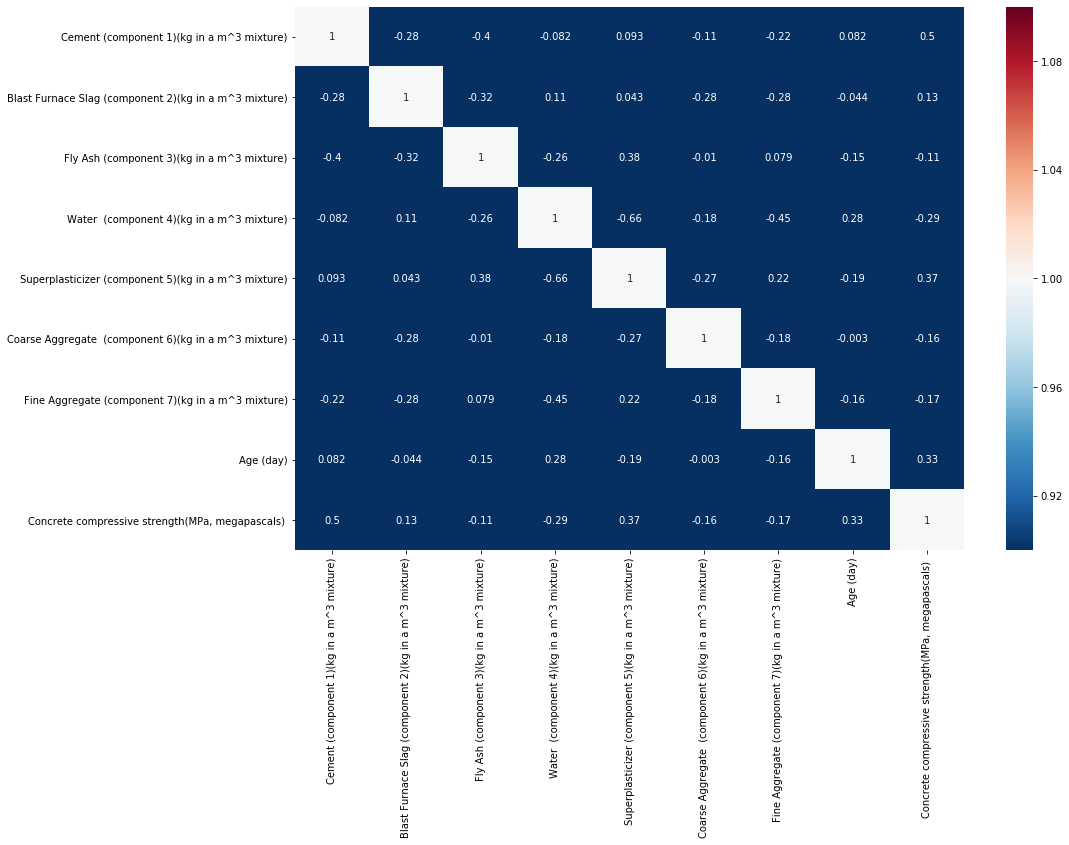

In [27]:
#Correclation
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=0, vmin=1, cmap="RdBu_r")

In [28]:
data = data.to_numpy()
X = data[:, :data.shape[1]-1]
y = data[:, data.shape[1]-1:]

In [29]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [30]:
#Scaling
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)

scaler = sklearn.preprocessing.StandardScaler()
X_test = scaler.fit(X_test).transform(X_test)

In [31]:
def errors_data(y_train, y_predict):
    mean_square_error = sklearn.metrics.mean_squared_error(y_train, y_predict)
    print("Root Mean Squared", mean_square_error)
    mean_absolut = sklearn.metrics.mean_absolute_error(y_train.ravel(), y_predict.ravel())
    print("Mean Absoulte Error", mean_absolut)
    return mean_square_error, mean_absolut

In [32]:
#Support vector Regression
param_grid = {
    'kernel':["rbf", "linear", "poly", "sigmoid"],
    'gamma':['auto', 'scale']
}
SVR = sklearn.svm.SVR()
grid_search_cv = sklearn.model_selection.GridSearchCV(SVR, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.0s finished


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.6057909247649319
Root Mean Squared 89.34035249761597
Mean Absoulte Error 7.2903118853738
Root Mean Squared 123.39072529520604
Mean Absoulte Error 8.693228554098486


In [33]:
#Decision Tree Regression
param_grid = {
    'splitter':['best', 'random'],
    "max_depth": np.arange(1, 50, 1),
    "min_samples_split":np.arange(2,8,1),
}

decision_tree_regression = sklearn.tree.DecisionTreeRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(decision_tree_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeRegressor(criterion='mse', max_depth=37, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.8433842299457944
Root Mean Squared 0.8945897671504078
Mean Absoulte Error 0.06367293328008733
Root Mean Squared 78.46036304805821
Mean Absoulte Error 6.3043817511062965


[Parallel(n_jobs=1)]: Done 2940 out of 2940 | elapsed:   34.9s finished


In [34]:
#Random Forest Regression
param_grid = {
    'n_estimators': np.arange(1, 20, 2),
    'max_depth':np.arange(1,12,1),
}

random_forest_regression = sklearn.ensemble.RandomForestRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(random_forest_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:   45.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=19,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
0.8927464076636401
Root Mean Squared 5.6665068881787475
Mean Absoulte Error 1.5980553194422717
Root Mean Squared 41.05409043602234
Mean Absoulte Error 4.691500265434114


In [35]:
#Ada boost regression
param_grid = {
    'n_estimators': np.arange(1,20,1),
    'learning_rate': np.arange(0.1,2,0.1),
    'loss':['linear', 'square', 'exponential']
}
ada_boost_regression = sklearn.ensemble.AdaBoostRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(ada_boost_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 1083 candidates, totalling 5415 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AdaBoostRegressor(base_estimator=None, learning_rate=1.4000000000000001,
                  loss='square', n_estimators=19, random_state=0)
0.7753904008801589
Root Mean Squared 53.30577619922095
Mean Absoulte Error 6.061487678669941
Root Mean Squared 82.3106639499308
Mean Absoulte Error 7.393199572978243


[Parallel(n_jobs=1)]: Done 5415 out of 5415 | elapsed:  5.3min finished


In [36]:
#linear regression
param_grid={
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'n_jobs':np.arange(1, 10, 1)
}
linear_regression = sklearn.linear_model.LinearRegression()
grid_search_cv = sklearn.model_selection.GridSearchCV(linear_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.7min finished


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
0.5937921469990146
Root Mean Squared 104.00755552060677
Mean Absoulte Error 8.116346910235768
Root Mean Squared 123.39698785891834
Mean Absoulte Error 8.86945051249501


In [37]:
#Gaussian Process Regression
param_grid={
    'kernel': [sklearn.gaussian_process.kernels.DotProduct(), sklearn.gaussian_process.kernels.WhiteKernel(), sklearn.gaussian_process.kernels.RBF()],
    'n_restarts_optimizer':np.arange(0,10,1),
    'normalize_y':[True, False]
}
gaussian_process_regression = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(gaussian_process_regression, param_grid, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 33.8min finished


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1), n_restarts_optimizer=4,
                         normalize_y=True, optimizer='fmin_l_bfgs_b',
                         random_state=0)
0.5941151897316813
Root Mean Squared 104.00458804477881
Mean Absoulte Error 8.116514281621978
Root Mean Squared 123.41005148413831
Mean Absoulte Error 8.869973525355315


In [38]:
#neural network regression
hidden_layer_size = [(x, ) for x in np.arange(1, 50,1)]
param_grid={
    'hidden_layer_sizes': hidden_layer_size,
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
}
neural_network_regression = sklearn.neural_network.MLPRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(neural_network_regression, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 3 folds for each of 196 candidates, totalling 588 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 588 out of 588 | elapsed: 16.6min finished


MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(48,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
0.20900550261841683
Root Mean Squared 105.7970850907707
Mean Absoulte Error 8.255411715333466
Root Mean Squared 127.82925938243751
Mean Absoulte Error 9.003643466452292
